# K-Fold Cross Validation
The full data set is divided into k-subsets and the holdout method is repeated K times, Each time one of the K-Subsets is used as the test set and the other K-1 subsets are put together to be used to train the model.
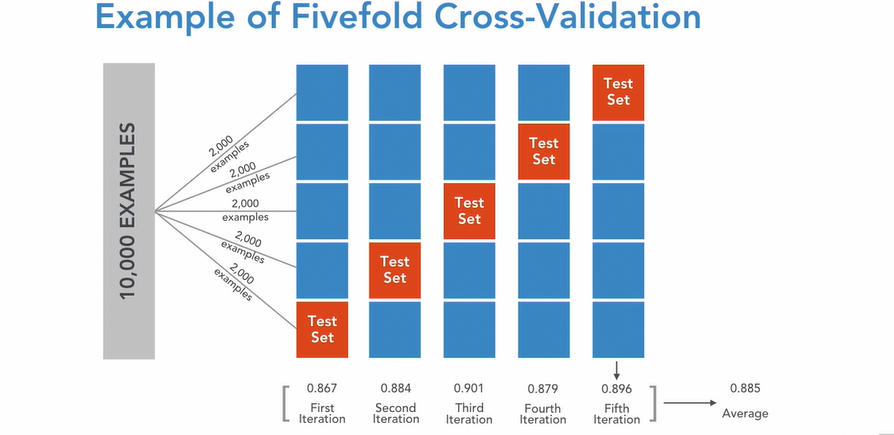

### Evaluation Metrics 
1. Accuracy
2. Precision
3. Recall

### Ensemble Learning
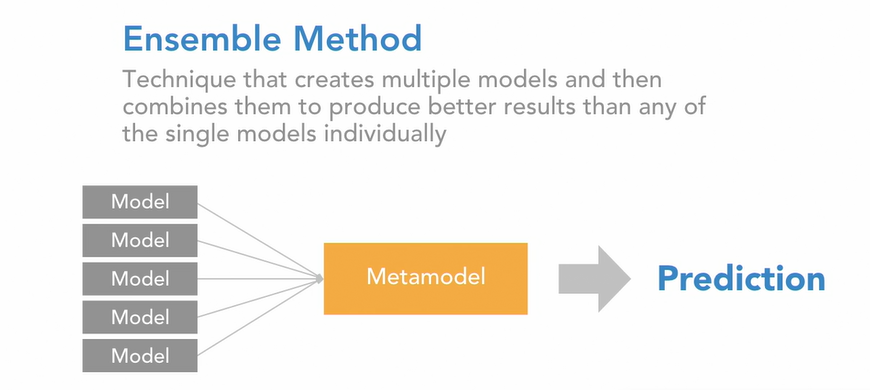

### Benfits of Ensemble Methods 
1. Used for classification, regression
2. Easily handle outliers, missing values, etc.
3. Accepts various types of inputs (continous, ordinal, etc)
4. Less likely to overfit
5. Outputs feature importance

# Building Machine Learning Classifiers

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
stopwords = stopwords.words('english')

ps = nltk.PorterStemmer()

data = pd.read_csv('SMSSpamCollection.tsv', sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = " ".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    
    return text


tfidf_vect = TfidfVectorizer(analyzer=clean_text)
x_tfidf = tfidf_vect.fit_transform(data['body_text'])

x_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(x_tfidf.toarray())], axis=1)
x_features.head(5)

,body_len,punct%,0,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,35
0,128,4.7,0.0,0.407835,0.404488,0.377792,0.0,0.083078,0.257807,0.0,...,0.071960,0.146075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.092025,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.472269,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [17]:
gb = GradientBoostingClassifier()
param = {
    'n_estimators' : [100, 150],
    'max_depth' : [7, 11, 15],
    'learning_rate' : [0.1]
}

gs = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv.fit = gs.fit(x_features, data['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

NameError: name 'cv' is not defined